# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Loading the data  [1 Mark]

In [4]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
import pandas as pd
df = pd.read_csv('credit_risk_dataset.csv')

### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [5]:
# Get the shape of the dataframe
df.shape

(32581, 12)

In [7]:
# Display few rows of the dataframe
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [ ]:
# Display the total number of null values of each column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [11]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
mean_emp_length = df['person_emp_length'].mean()
df['person_emp_length'].fillna(mean_emp_length, inplace=True)

mean_loan_int_rate = df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(mean_loan_int_rate, inplace=True)

df.isnull().sum()

/tmp/ipykernel_6457/2564045568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(mean_emp_length, inplace=True)
/tmp/ipykernel_6457/2564045568.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Handling categorical columns [3 Marks]

In [ ]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [21]:
# Get the distinct categories present in each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file: ['Y' 'N']


In [22]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
mapping_dicts = {
    'person_home_ownership': {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3},
    'loan_intent': {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5},
    'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
    'cb_person_default_on_file': {'N': 0, 'Y': 1}
}

In [23]:
# Map categorical values to numbers using respective dictionaries
for col in categorical_cols:
    df[col] = df[col].replace(mapping_dicts[col])

/tmp/ipykernel_6457/438791611.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping_dicts[col])


In [24]:
# Display the data to observe the changes
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,3,35000,16.02,1,0.59,1,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,1,4


#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

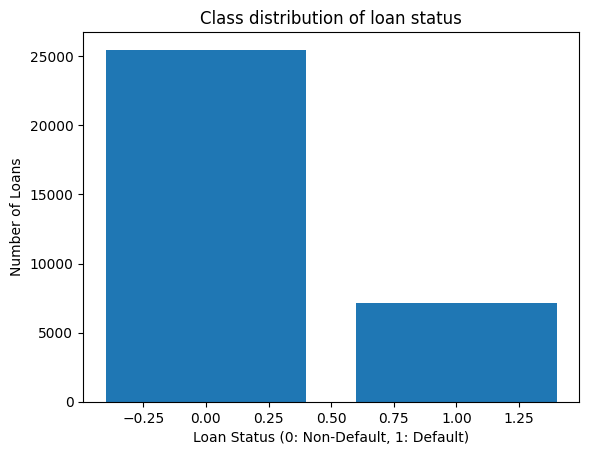

In [25]:
# Calculate the class distribution
class_counts = df['loan_status'].value_counts()

# Create a bar plot
import matplotlib.pyplot as plt

plt.bar(class_counts.index, class_counts.values)
plt.title('Class distribution of loan status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Number of Loans')
plt.show()

### Define target variable and features [1 Mark]

In [27]:
# Define features(X) and target variable(y)
x = df.drop('loan_status', axis=1)
y = df['loan_status']

### Train-Test split [1 Mark]

In [28]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [30]:
# Calculate the class distribution in the training set
y_train.value_counts(normalize=True)

loan_status
0    0.781845
1    0.218155
Name: proportion, dtype: float64

In [31]:
# Calculate the class distribution in the testing set
y_train.value_counts(normalize=True)

loan_status
0    0.781845
1    0.218155
Name: proportion, dtype: float64

In [32]:
#Original dataset distribution
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

### Feature Scaling [1 Mark]

In [33]:
# Initialize StandardScaler and transform the training and testing features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Training [3 Mars]


In [35]:
# Initialize the LogisticRegression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

# Fit the model with the SCALED training data
LR_model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# Initialize the DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
# Initialize the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
RF_model.fit(x_train, y_train)

RandomForestClassifier()

### Model Evaluation [2 Marks]


In [38]:
# Make predictions on the test set with each of the models above
LR_pred = LR_model.predict(x_test)
DT_pred = DT_model.predict(x_test)
RF_pred = RF_model.predict(x_test)

In [39]:
# Evaluate each of the model performance

# Show accuracy, f1 score, precision, & recall for each of the trained models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [42]:
#Logistic Regression
accuracy = accuracy_score(y_test, LR_pred)
f1 = f1_score(y_test, LR_pred)
precision = precision_score(y_test, LR_pred)
recall = recall_score(y_test, LR_pred)

print(f"Accuracy : {accuracy}")
print(f"F1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")

Accuracy : 0.8491637256406321
F1 score : 0.5822354441138972
Precision : 0.7357679914070892
Recall : 0.48171589310829815


In [40]:
#Decision Tree
accuracy = accuracy_score(y_test, DT_pred)
f1 = f1_score(y_test, DT_pred)
precision = precision_score(y_test, DT_pred)
recall = recall_score(y_test, DT_pred)

print(f"Accuracy : {accuracy}")
print(f"F1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}") 

Accuracy : 0.8838422587079945
F1 score : 0.7411965811965812
Precision : 0.7212242182302062
Recall : 0.7623066104078763


In [41]:
#Random Forest
accuracy = accuracy_score(y_test, RF_pred)
f1 = f1_score(y_test, RF_pred)
precision = precision_score(y_test, RF_pred)
recall = recall_score(y_test, RF_pred)

print(f"Accuracy : {accuracy}")
print(f"F1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}") 

Accuracy : 0.9323308270676691
F1 score : 0.8222490931076178
Precision : 0.9631728045325779
Recall : 0.7172995780590717


### Inference [2 Marks]

In [50]:
# Create a sample input dictionary with keys as feature names and values as feature values
sample_input = {
    'person_age': 30,
    'person_income': 60000,
    'person_home_ownership': 'RENT',
    'person_emp_length': 3,
    'loan_intent': 'EDUCATION',
    'loan_grade': 'B',
    'loan_amnt': 10000,
    'loan_int_rate': 8.5,
    'loan_percent_income': 0.15,
    'cb_person_default_on_file': 'N',
    'cb_person_cred_hist_length': 4
}

# Convert the sample input dictionary into a dataframe to feed to the model
sample_input_df = pd.DataFrame([sample_input])

In [48]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
def predict(sample_input_df):
    #Mapping categorical features
    for col in mapping_dicts:
        sample_input_df[col] = sample_input_df[col].replace(mapping_dicts[col])
    
    #Scaling numerical features
    sample_input_scaled = scaler.transform(sample_input_df)

    #Prediction using Random Forest
    prediction = RF_model.predict(sample_input_scaled)[0]
    return prediction

In [51]:
# Make prediction using the defined function using the sample input
prediction = predict(sample_input_df)

if prediction == 1:
    print("The borrower is likely to default on the loan.")
else:
    print("The borrower is likely to repay (non default) the loan.")

The borrower is likely to repay (non default) the loan.


/tmp/ipykernel_6457/253068601.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_input_df[col] = sample_input_df[col].replace(mapping_dicts[col])
